In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

In [41]:
base = pd.read_csv("data/mt_cars.csv")

base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [42]:
base.shape

(32, 12)

In [43]:
base.drop(["Unnamed: 0"], axis=1, inplace=True)

base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

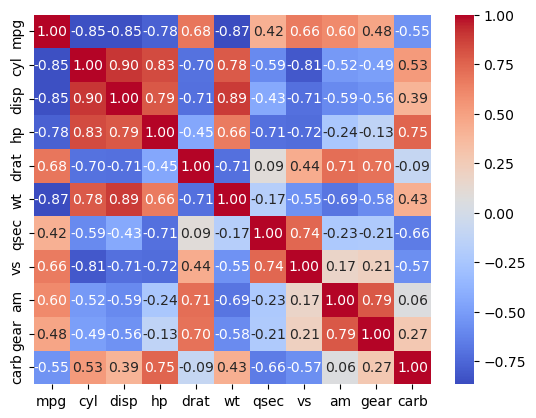

In [44]:
car_corr = base.corr()
sns.heatmap(car_corr, cmap="coolwarm", annot=True, fmt=".2f")

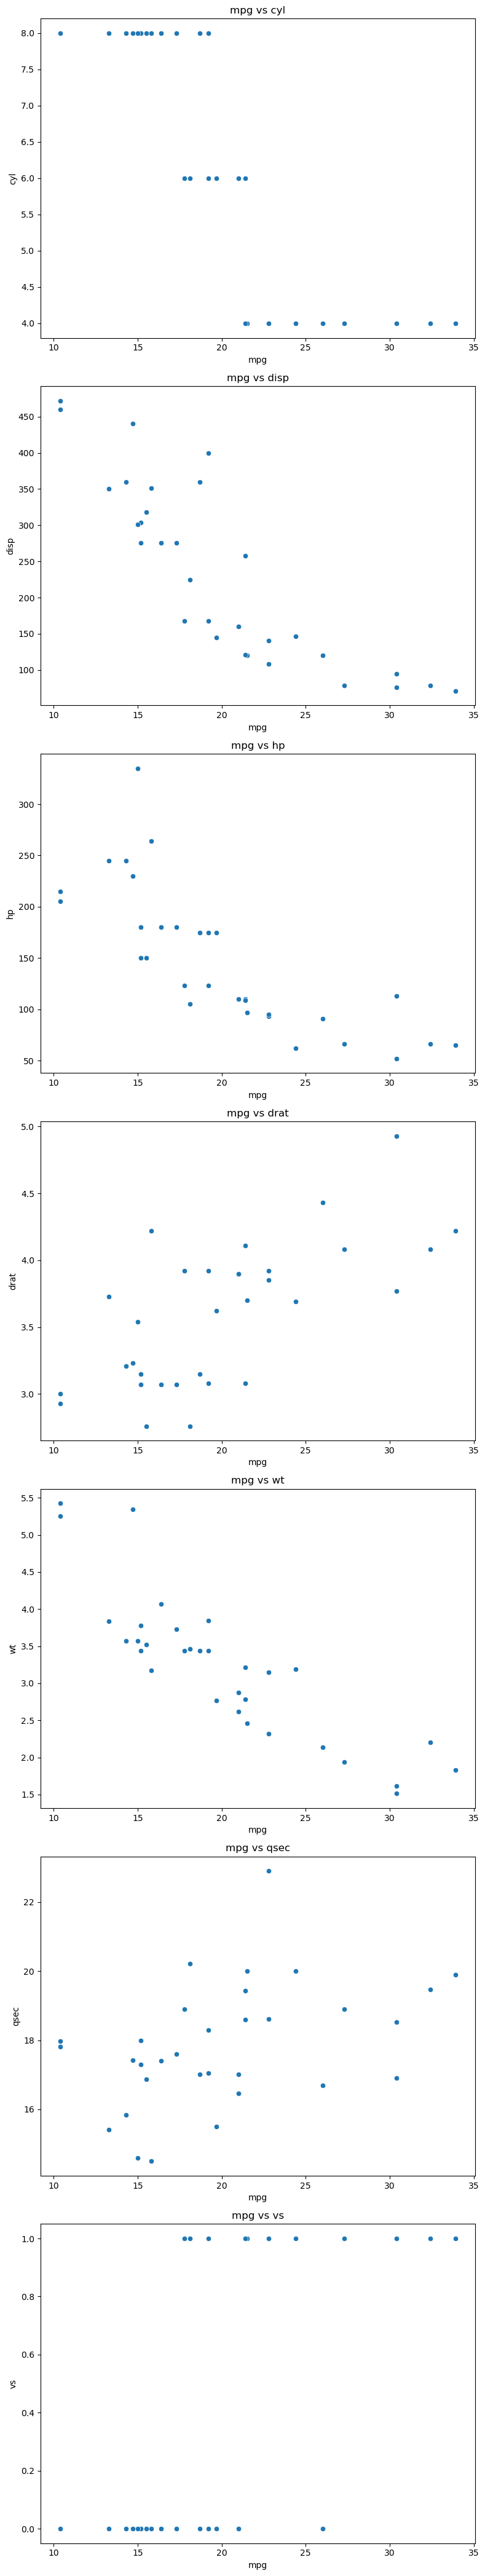

In [45]:
column_pairs = [
    ("mpg", "cyl"),
    ("mpg", "disp"),
    ("mpg", "hp"),
    ("mpg", "drat"),
    ("mpg", "wt"),
    ("mpg", "qsec"),
    ("mpg", "vs"),
]

n_plots = len(column_pairs)

fig, axes = plt.subplots(n_plots, 1, figsize=(8, 6 * n_plots))

for i, (x, y) in enumerate(column_pairs):
    sns.scatterplot(x=x, y=y, data=base, ax=axes[i])
    axes[i].set_title(f"{x} vs {y}")

plt.tight_layout()
plt.show()

In [46]:
# AIC 156.6
# BIC 162.5
modelo = sm.OLS(base["mpg"], sm.add_constant(base[["disp", "hp", "wt"]]))

# AIC 165.1
# BIC 166.5
modelo = sm.OLS(base["mpg"], sm.add_constant(base[["disp", 'cyl']]))

# AIC 179.1
# BIC 183.5
modelo = sm.OLS(base["mpg"], sm.add_constant(base[['drat', 'vs']]))


modelo = modelo.fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           5.82e-07
Time:                        14:45:14   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

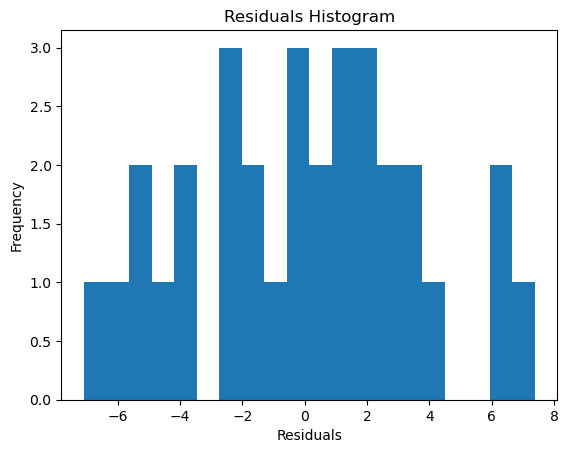

In [47]:
residuos = modelo.resid

plt.hist(residuos, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()

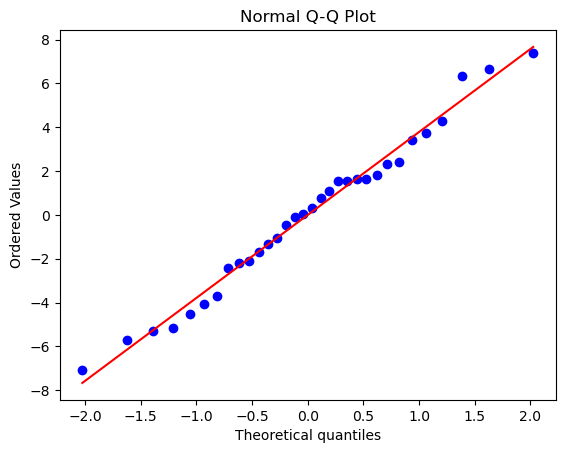

In [48]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [49]:
# h0 = residuals are normally distributed
# h1 = residuals are not normally distributed
# p-value <= 0.05, we reject h0 
# p-value > 0.05, we fail to reject h0

stat, pval = stats.shapiro(residuos)

print(f"Statistics={stat: .3f}, p-value={pval: .3f}")

Statistics= 0.981, p-value= 0.822
